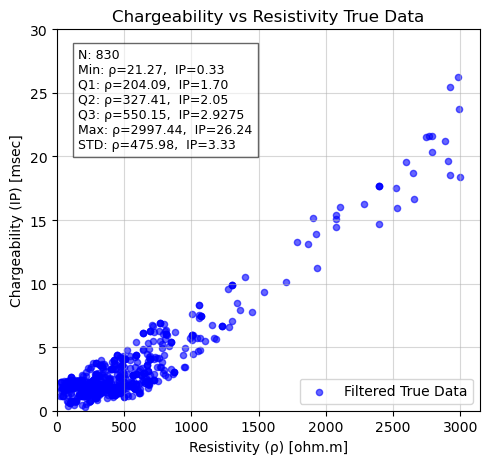

Statistical estimates saved to 'Statistical_Estimates.csv'


In [25]:
# Dispalying Filtered Raw Joint IP and Resistivity Datasets and Important Statistical Estimates 

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load dataset
file_path = "C:/Users/aking/OneDrive/Desktop/All Files/Papers under Review/ERT_IPT/ERT-IPT ML Datasets.csv"
data = pd.read_csv(file_path)

# Calculate the number of data points (N)
N = len(data)

# Calculate statistical estimates for resistivity and seismic Vp
stats = {
    'Statistic': ['Min', 'Max', 'Q1', 'Q2 (Median)', 'Q3', 'STD'],
    'Resistivity (ρ)': [
        data['Resistivity (ohm.m)'].min(),
        data['Resistivity (ohm.m)'].max(),
        data['Resistivity (ohm.m)'].quantile(0.25),
        data['Resistivity (ohm.m)'].median(),
        data['Resistivity (ohm.m)'].quantile(0.75),
        data['Resistivity (ohm.m)'].std()
    ],
    'Chargeability (IP)': [
        data['Chargeability (msec)'].min(),
        data['Chargeability (msec)'].max(),
        data['Chargeability (msec)'].quantile(0.25),
        data['Chargeability (msec)'].median(),
        data['Chargeability (msec)'].quantile(0.75),
        data['Chargeability (msec)'].std()
    ]
}

stats_df = pd.DataFrame(stats)

# Construct the statistical text box
text_str = (
    f"N: {N}\n"
    f"Min: ρ={data['Resistivity (ohm.m)'].min():.2f},  IP={data['Chargeability (msec)'].min():.2f}\n"
    f"Q1: ρ={data['Resistivity (ohm.m)'].quantile(0.25):.2f},  IP={data['Chargeability (msec)'].quantile(0.25):.2f}\n"
    f"Q2: ρ={data['Resistivity (ohm.m)'].median()},  IP={data['Chargeability (msec)'].median()}\n"
    f"Q3: ρ={data['Resistivity (ohm.m)'].quantile(0.75)},  IP={data['Chargeability (msec)'].quantile(0.75)}\n"
    f"Max: ρ={data['Resistivity (ohm.m)'].max():},  IP={data['Chargeability (msec)'].max()}\n"
    f"STD: ρ={data['Resistivity (ohm.m)'].std():.2f},  IP={data['Chargeability (msec)'].std():.2f}"
)

# Scatter plot for true data
plt.figure(figsize=(5, 5))
plt.scatter(
    data['Resistivity (ohm.m)'], data['Chargeability (msec)'],
    label="Filtered True Data", alpha=0.6, color='blue', s=20
)

plt.text(
    0.05, 0.95, # Top-left corner
    text_str, 
    transform=plt.gca().transAxes, 
    fontsize=9, 
    verticalalignment='top',
    horizontalalignment='left', 
    bbox=dict(facecolor='white', alpha=0.6)
)

# Add plot details
plt.title("Chargeability vs Resistivity True Data")
plt.xlabel("Resistivity (ρ) [ohm.m]")
plt.ylabel("Chargeability (IP) [msec]")
plt.xlim(0,)
plt.ylim(0, 30)
ax = plt.gca() 
ax.spines['left'].set_position(('data', 0))   # position y-axis at x=0
ax.spines['bottom'].set_position(('data', 0))   # position x-axis at y=0
plt.legend(title="", loc='lower right')
plt.grid(alpha=0.5)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Chargeability_vs_Resistivity_with_Stats_Box_Corrected.png", dpi=800)
plt.show()

# Save statistical estimates to CSV
stats_df.to_csv("Statistical_Estimates.csv", index=False)
print("Statistical estimates saved to 'Statistical_Estimates.csv'")


Skewness of the data:
Resistivity (ohm.m)     3.122848
Chargeability (msec)    3.906237
dtype: float64


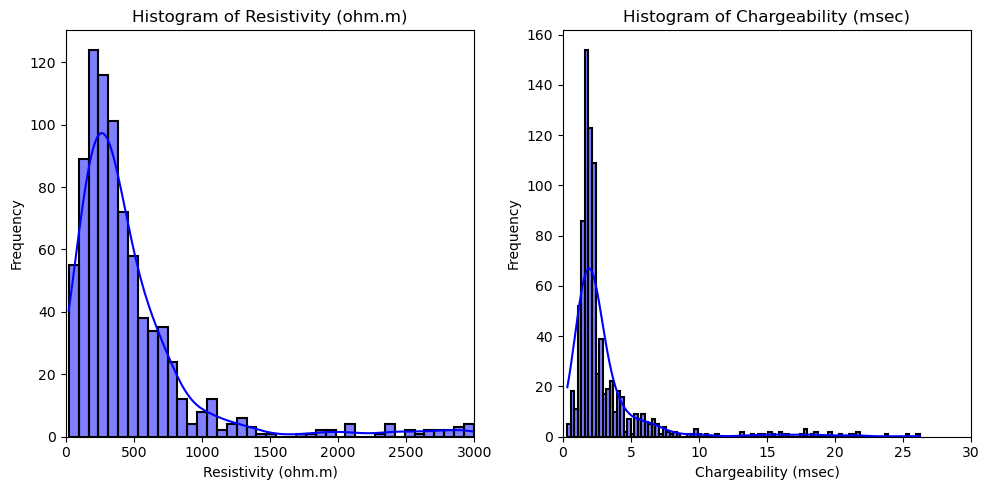

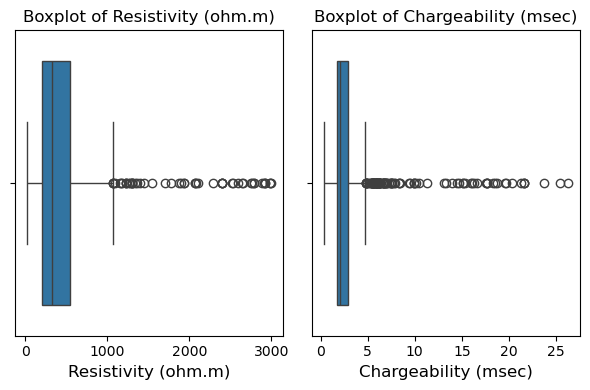

In [3]:
# Determining data skewness and significant outliers in the filtered true chargeability and resistivity datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load dataset from the specified file path
file_path = "C:/Users/aking/OneDrive/Desktop/All Files/Papers under Review/ERT_IPT/ERT-IPT ML Datasets.csv"
data = pd.read_csv(file_path)

# Calculate the skewness for each feature
skewness = data[['Resistivity (ohm.m)', 'Chargeability (msec)']].apply(skew)
print("Skewness of the data:")
print(skewness)

# Plot histograms to inspect skewness visually
plt.figure(figsize=(10, 5))
columns = ['Resistivity (ohm.m)', 'Chargeability (msec)']
for i, column in enumerate(columns, start=1):
    plt.subplot(1, 2, i)
    sns.histplot(data[column], kde=True, color='blue', linewidth=1.5)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

    if column == 'Resistivity (ohm.m)':
        plt.xlim(0, 3000)
    elif column == 'Chargeability (msec)':
        plt.xlim(0, 30)

plt.tight_layout()
plt.savefig("Histograms_Skewness.png", dpi=800)
plt.show()

# Plot boxplots to check for outliers
plt.figure(figsize=(6, 4))
for i, column in enumerate(['Resistivity (ohm.m)', 'Chargeability (msec)'], start=1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}", fontsize=12)
    plt.xlabel(column, fontsize=12, color="black")

plt.tight_layout()
plt.savefig("Boxplots_Outliers.png", dpi=800)
plt.show()


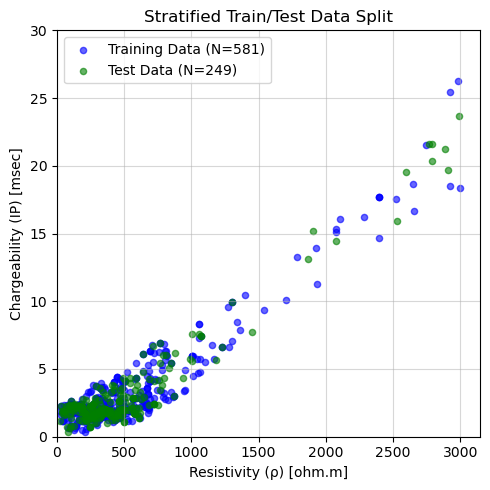

In [ ]:
# Splitting the filtered true chargeability and resistivity datasets into training and testing datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "C:/Users/aking/OneDrive/Desktop/All Files/Papers under Review/ERT_IPT/ERT-IPT ML Datasets.csv"
data = pd.read_csv(file_path)

# Create bins and split indices for stratification based on Chargeability (msec)
data['IP_bin'] = pd.qcut(data['Chargeability (msec)'], q=10, labels=False)

# Single train/test split (70% train, 30% test)
train_indices, test_indices = train_test_split(
    data.index,
    test_size=0.3,
    stratify=data['IP_bin'],
    random_state=42
)

# Create and save training, test true datasets
True_train_data = data.loc[train_indices].copy()
True_test_data  = data.loc[test_indices].copy()

True_train_data.to_csv("True_Stratified_Training_Data.csv", index=False)
True_test_data.to_csv("True_Stratified_Testing_Data.csv", index=False)

# Define X and y for each split using the relevant columns
X_train = True_train_data[['Resistivity (ohm.m)']]
y_train = True_train_data['Chargeability (msec)']

X_test = True_test_data[['Resistivity (ohm.m)']]
y_test = True_test_data['Chargeability (msec)']

# Get sample counts
train_count = len(X_train)
test_count  = len(X_test)

# Create scatter plot: training vs. test datasets
plt.figure(figsize=(5, 5))
plt.scatter(
    X_train['Resistivity (ohm.m)'],
    y_train,
    label=f"Training Data (N={train_count})",
    color='blue', alpha=0.6, s=20
)
plt.scatter(
    X_test['Resistivity (ohm.m)'],
    y_test,
    label=f"Test Data (N={test_count})",
    color='green', alpha=0.6, s=20
)

plt.title("Stratified Train/Test Data Split")
plt.xlabel("Resistivity (ρ) [ohm.m]")
plt.ylabel("Chargeability (IP) [msec]")
plt.xlim(0,)
plt.ylim(0, 30)
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Training_Testing_Stratified_Model.png", dpi=800)
plt.show()


In [ ]:
# ML modeling for co-analyzing Chargeability and resistivity datasets   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import StackingRegressor


# Load true stratified datasets
True_train_data = pd.read_csv("True_Stratified_Training_Data.csv")
True_test_data = pd.read_csv("True_Stratified_Testing_Data.csv")

# Initialize and fit scaler only on training data
scaler = MinMaxScaler()
scaler.fit(True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']])

# Transform both training and test data using the same scaler
True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)
True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)

# Extract feature (X) and target (y) for ML modeling
X_train, y_train = True_train_data[['Resistivity (ohm.m)']], True_train_data['Chargeability (msec)']
X_test, y_test = True_test_data[['Resistivity (ohm.m)']], True_test_data['Chargeability (msec)']

# Define a CNN Model for 1D Tabular Data
def create_cnn_model(n_features=1):
    model = keras.Sequential([
        keras.layers.Input(shape=(n_features, 1)),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def create_cnn_regressor(n_features): 
    return KerasRegressor(model=create_cnn_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0)

n_features = X_train.shape[1]

def make_log_ttr(regressor):
    return TransformedTargetRegressor(regressor=regressor, transformer=FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True))

# Define models with adjusted parameters for ML models
models = {
    "SLR": make_log_ttr(LinearRegression()),
    "SLR_poly": Pipeline([("poly", PolynomialFeatures(degree=3)), ("lr", LinearRegression())]),
    "SVM": SVR(kernel='rbf', C=4.0, epsilon=0.009, gamma='scale'),
    "RF": RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', random_state=42),
    "DT": DecisionTreeRegressor(max_depth=8, min_samples_split=4, min_samples_leaf=4, random_state=42),
    "XGB": GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, min_samples_leaf=5, random_state=42),
    "CatB": CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0),
    "ANN": MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=5000, alpha=0.0001, learning_rate_init=0.0001, early_stopping=True, 
            validation_fraction=0.1, n_iter_no_change=50, random_state=42),
    "CNN": create_cnn_regressor(n_features=n_features)
}

# Add a StackingRegressor that uses all models above as base learners
stacked_reg = StackingRegressor(
    estimators=[
        ('SLR',  models['SLR']), ('SLR_poly',  models['SLR_poly']), ('SVM',  models['SVM']), ('RF',   models['RF']), ('DT',   models['DT']),
        ('XGB',  models['XGB']), ('CatB', models['CatB']), ('ANN',  models['ANN']), ('CNN',  models['CNN'])],
    final_estimator=LinearRegression(),
    passthrough=False
)
models["Stacked"] = stacked_reg

# Train and evaluate models with metrics
train_results = []
test_results = []
correlation_results = {}

# Custom MAE (Mean Absolute Error) implementation
def mean_absolute_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    absolute_errors = np.abs(y_true - y_pred)
    return np.mean(absolute_errors)

# Train and evaluate models with metrics
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

   # Adjusted R^2 for training
    train_adj_r2 = 1 - (1 - train_r2) * (len(y_train) - 1) / (len(y_train) - X_train.shape[1] - 1)

    train_results.append({"Model": name, "MAE": train_mae, "MSE": train_mse, "RMSE": train_rmse, "R^2": train_r2, "Adj. R^2": train_adj_r2})

    # Metrics for test data
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    test_results.append({"Model": name, "MAE": test_mae, "MSE": test_mse, "RMSE": test_rmse, "R^2": test_r2, "Adj. R^2": train_adj_r2,})

    # Predictions for correlation plots
    correlation_results[name] = {"y_test": y_test, "y_test_pred": y_test_pred}

# Convert results to DataFrames and save
train_results_df = pd.DataFrame(train_results)
test_results_df  = pd.DataFrame(test_results)

train_results_df.to_csv("Training_Results_Stratified.csv", index=False)
test_results_df.to_csv("Testing_Results_Stratified.csv",  index=False)

train_results_df = pd.DataFrame(train_results)
test_results_df  = pd.DataFrame(test_results)

# Generating correlation plots with performance metrics
train_results_df.to_csv("Training_Results_Stratified.csv", index=False)
test_results_df.to_csv("Testing_Results_Stratified.csv",  index=False)

for name, result in correlation_results.items():
    mse = mean_squared_error(result["y_test"], result["y_test_pred"])
    rmse = np.sqrt(mse)
    r2 = r2_score(result["y_test"], result["y_test_pred"])
    
    plt.figure(figsize=(5, 5))
    plt.scatter(result["y_test"], result["y_test_pred"], label="Test Data", alpha=0.7, edgecolor='k')
    plt.plot([result["y_test"].min(), result["y_test"].max()],[result["y_test"].min(), result["y_test"].max()],color="red",linewidth=2,linestyle="--",label="Perfect Fit")
    text_str = (f"RMSE: {rmse:.2f}\n" f"R²: {r2:.3f}")
    plt.text(0.05, 0.95, text_str, transform=plt.gca().transAxes, fontsize=12, color="black", verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
    plt.title(f"{name} Correlation Plot")
    plt.xlabel("Normalized Actual IP (msec)")
    plt.xlim(0, 1.0)
    plt.ylabel("Normalized Predicted IP (msec)")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{name}_Correlation_Plot_Stratified_With_Metrics.png", dpi=800)
    plt.close()

print("Plots with performance metrics generated and saved successfully.")
print("Training Results (Stratified Sampling):")
print(train_results_df)
print("\nTesting Results (Stratified Sampling):")
print(test_results_df)


Plots with performance metrics generated and saved successfully.
Training Results (Stratified Sampling):
      Model       MAE       MSE      RMSE       R^2  Adj. R^2
0       SLR  0.033091  0.001745  0.041777  0.881739  0.881535
1  SLR_poly  0.027280  0.001350  0.036747  0.908501  0.908343
2       SVM  0.025372  0.001362  0.036905  0.907714  0.907554
3        RF  0.019988  0.000863  0.029384  0.941494  0.941393
4        DT  0.020397  0.000869  0.029480  0.941111  0.941009
5       XGB  0.020910  0.000865  0.029417  0.941362  0.941261
6      CatB  0.020510  0.000854  0.029229  0.942112  0.942012
7       ANN  0.027596  0.001348  0.036719  0.908640  0.908482
8       CNN  0.026889  0.001333  0.036517  0.909644  0.909488
9   Stacked  0.024059  0.001070  0.032705  0.927523  0.927398

Testing Results (Stratified Sampling):
      Model       MAE       MSE      RMSE       R^2  Adj. R^2
0       SLR  0.034043  0.001758  0.041923  0.914303  0.881535
1  SLR_poly  0.026930  0.001183  0.034394  0.9423

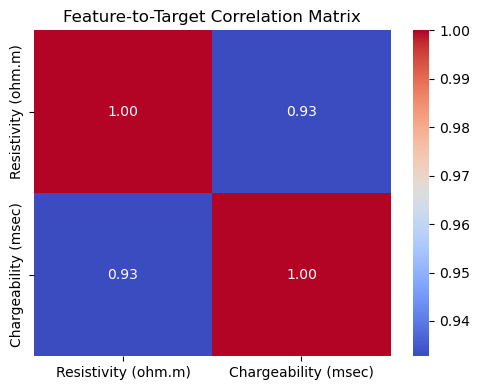

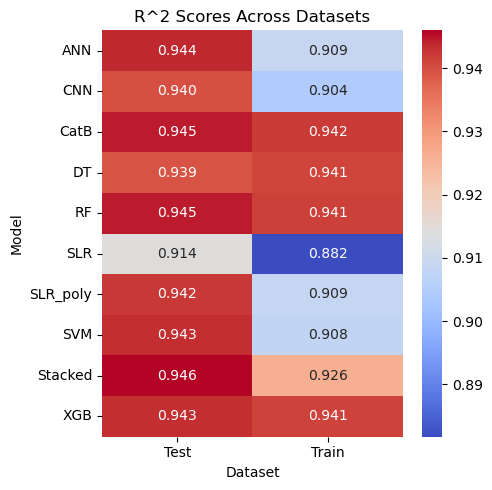

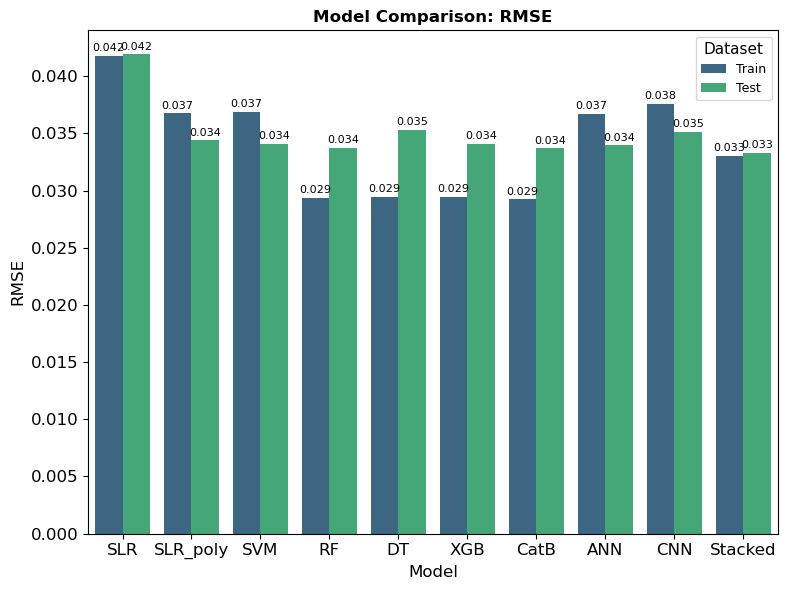

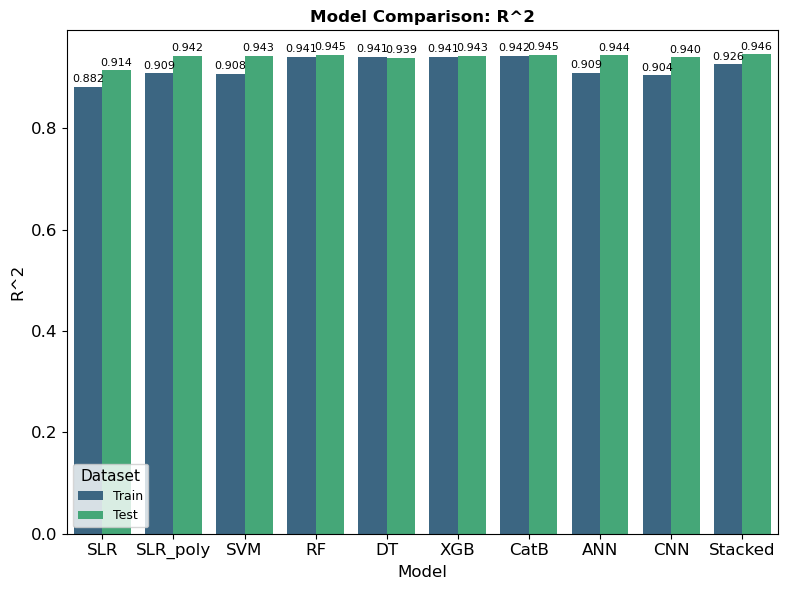

In [35]:
# Determination of ML model performance via metrics assessment and correlation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import StackingRegressor

# Load true stratified datasets
True_train_data = pd.read_csv("True_Stratified_Training_Data.csv")
True_test_data = pd.read_csv("True_Stratified_Testing_Data.csv")

# Initialize and fit scaler only on training data
scaler = MinMaxScaler()
scaler.fit(True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']])

# Transform both training and test data using the same scaler
True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)
True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)

# Extract feature (X) and target (y) for ML modeling
X_train, y_train = True_train_data[['Resistivity (ohm.m)']], True_train_data['Chargeability (msec)']
X_test, y_test = True_test_data[['Resistivity (ohm.m)']], True_test_data['Chargeability (msec)']

# Define a CNN Model for 1D Tabular Data
def create_cnn_model(n_features=1):
    model = keras.Sequential([
        keras.layers.Input(shape=(n_features, 1)),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def create_cnn_regressor(n_features): 
    return KerasRegressor(model=create_cnn_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0)

n_features = X_train.shape[1]

def make_log_ttr(regressor):
    return TransformedTargetRegressor(regressor=regressor, transformer=FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True))

# Define models with adjusted parameters for ML models
models = {
    "SLR": make_log_ttr(LinearRegression()),
    "SLR_poly": Pipeline([("poly", PolynomialFeatures(degree=3)), ("lr", LinearRegression())]),
    "SVM": SVR(kernel='rbf', C=4.0, epsilon=0.009, gamma='scale'),
    "RF": RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', random_state=42),
    "DT": DecisionTreeRegressor(max_depth=8, min_samples_split=4, min_samples_leaf=4, random_state=42),
    "XGB": GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, min_samples_leaf=5, random_state=42),
    "CatB": CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0),
    "ANN": MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=5000, alpha=0.0001, learning_rate_init=0.0001, early_stopping=True, 
            validation_fraction=0.1, n_iter_no_change=50, random_state=42),
    "CNN": create_cnn_regressor(n_features=n_features)
}

# Add a StackingRegressor that uses all models above as base learners
stacked_reg = StackingRegressor(
    estimators=[
        ('SLR',  models['SLR']), ('SLR_poly',  models['SLR_poly']), ('SVM',  models['SVM']), ('RF',   models['RF']), ('DT',   models['DT']),
        ('XGB',  models['XGB']), ('CatB', models['CatB']), ('ANN',  models['ANN']), ('CNN',  models['CNN'])],
    final_estimator=LinearRegression(),
    passthrough=False
)
models["Stacked"] = stacked_reg

# Evaluate models and collect results: training, validation, and testing datasets
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    datasets = [
        ("Train", X_train, y_train),
        ("Test", X_test, y_test),
    ]

    for label, X, y in datasets:
        y_pred = model.predict(X)

        # Compute metrics
        mse = mean_squared_error(y, y_pred)
        rmse = mse ** 0.5
        r2 = r2_score(y, y_pred)

        # Append results
        results.append({
            "Model": name,
            "Dataset": label,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r2
        })

results_df = pd.DataFrame(results)
results_df.to_csv("All_Model_Results_Stratified.csv", index=False)

# Subset for features and target only
subset_correlation = data[['Resistivity (ohm.m)', 'Chargeability (msec)']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(subset_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature-to-Target Correlation Matrix")
plt.tight_layout()
plt.savefig("Subset_Correlation_Matrix_Stratified.png", dpi=800)
plt.show()

# Heatmap for Performance Metrics
performance_pivot = results_df.pivot(index="Model", columns="Dataset", values="R^2")
plt.figure(figsize=(5, 5))
sns.heatmap(performance_pivot, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("R^2 Scores Across Datasets")
plt.tight_layout()
plt.savefig("R2_Heatmap_Stratified.png", dpi=800)
plt.show()

# Bar Plots for Metrics with values displayed on bars: RMSE, R^2
for metric in ["RMSE", "R^2"]:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=results_df, x="Model", y=metric, hue="Dataset", palette="viridis")
    ax.tick_params(axis='both', labelsize=12)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=8, padding=2)

    plt.title(f"Model Comparison: {metric}", fontsize=12, fontweight='bold')
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.legend(title="Dataset", fontsize=9, title_fontsize=11)
    plt.tight_layout()
    plt.savefig(f"Model_{metric}_Comparison_Stratified.png", dpi=800)
    plt.show()



Training SLR ...
Predicting with SLR ...
Training SLR_poly ...
Predicting with SLR_poly ...
Training SVM ...
Predicting with SVM ...
Training RF ...
Predicting with RF ...
Training DT ...
Predicting with DT ...
Training XGB ...
Predicting with XGB ...
Training CatB ...
Predicting with CatB ...
Training ANN ...
Predicting with ANN ...
Training CNN ...
Predicting with CNN ...
Training Stacked ...
Predicting with Stacked ...


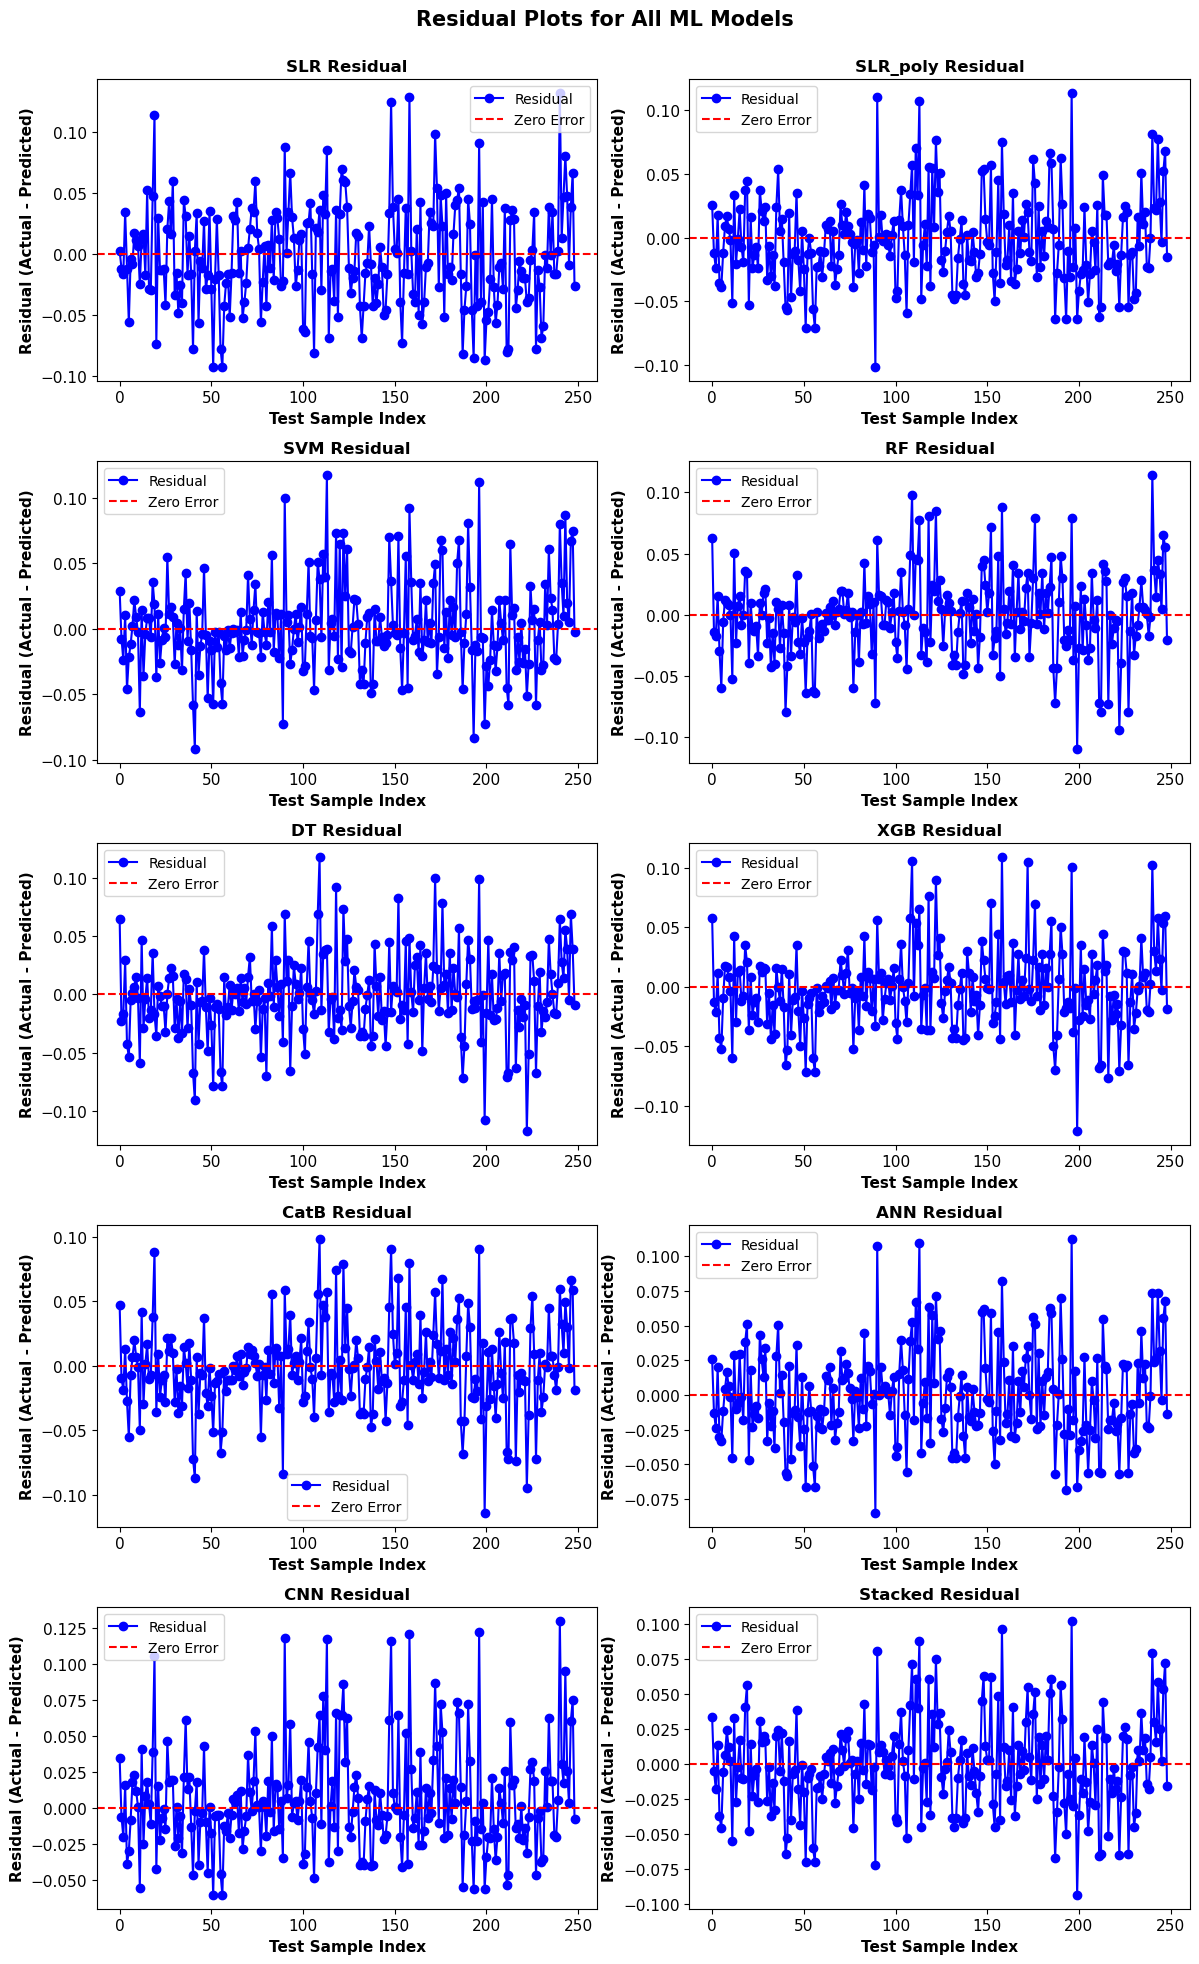


1D Residual Plots generated and saved successfully. Metrics removed as requested.


In [37]:
# Generating the Residual Plots for the Test Predicted ML and DL Model Sets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import StackingRegressor


# Load true stratified datasets
True_train_data = pd.read_csv("True_Stratified_Training_Data.csv")
True_test_data = pd.read_csv("True_Stratified_Testing_Data.csv")

# Initialize and fit scaler only on training data
scaler = MinMaxScaler()
scaler.fit(True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']])

# Transform both training and test data using the same scaler
True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)
True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)

# Extract feature (X) and target (y) for ML modeling
X_train, y_train = True_train_data[['Resistivity (ohm.m)']], True_train_data['Chargeability (msec)']
X_test, y_test = True_test_data[['Resistivity (ohm.m)']], True_test_data['Chargeability (msec)']

# Define a CNN Model for 1D Tabular Data
def create_cnn_model(n_features=1):
    model = keras.Sequential([
        keras.layers.Input(shape=(n_features, 1)),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def create_cnn_regressor(n_features): 
    return KerasRegressor(model=create_cnn_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0)

n_features = X_train.shape[1]

def make_log_ttr(regressor):
    return TransformedTargetRegressor(regressor=regressor, transformer=FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True))

# Define models with adjusted parameters for ML models
models = {
    "SLR": make_log_ttr(LinearRegression()),
    "SLR_poly": Pipeline([("poly", PolynomialFeatures(degree=3)), ("lr", LinearRegression())]),
    "SVM": SVR(kernel='rbf', C=4.0, epsilon=0.009, gamma='scale'),
    "RF": RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', random_state=42),
    "DT": DecisionTreeRegressor(max_depth=8, min_samples_split=4, min_samples_leaf=4, random_state=42),
    "XGB": GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, min_samples_leaf=5, random_state=42),
    "CatB": CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0),
    "ANN": MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=5000, alpha=0.0001, learning_rate_init=0.0001, early_stopping=True, 
            validation_fraction=0.1, n_iter_no_change=50, random_state=42),
    "CNN": create_cnn_regressor(n_features=n_features)
}

# Add a StackingRegressor that uses all models above as base learners
stacked_reg = StackingRegressor(
    estimators=[
        ('SLR',  models['SLR']), ('SLR_poly',  models['SLR_poly']), ('SVM',  models['SVM']), ('RF',   models['RF']), ('DT',   models['DT']),
        ('XGB',  models['XGB']), ('CatB', models['CatB']), ('ANN',  models['ANN']), ('CNN',  models['CNN'])],
    final_estimator=LinearRegression(),
    passthrough=False
)
models["Stacked"] = stacked_reg

# TRAIN & GENERATE 1D RESIDUAL PLOTS
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))
axes = axes.flatten()

idx = 0
for name, model in models.items():
    print(f"Training {name} ...")
    model.fit(X_train, y_train)

    print(f"Predicting with {name} ...")
    y_test_pred = model.predict(X_test)

    # Residual = actual - predicted
    residual = y_test.values - y_test_pred

   # Line plot
    ax = axes[idx]
    ax.plot(residual, marker='o', linestyle='-', color='blue', label='Residual')
    ax.axhline(0, color='red', linestyle='--', label='Zero Error')
    ax.set_title(f"{name} Residual", fontsize=12, fontweight='bold')
    ax.set_xlabel("Test Sample Index", fontsize=11, fontweight='bold')
    ax.set_ylabel("Residual (Actual - Predicted)", fontsize=11, fontweight='bold')  
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.legend()
    idx += 1

# Hide extra subplots if fewer than 12
if idx < len(axes):
    for ax in axes[idx:]:
        ax.set_visible(False)

plt.suptitle("Residual Plots for All ML Models", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("All_Models_1D_Residual_Plots.png", dpi=800)
plt.show()

print("\n1D Residual Plots generated and saved successfully. Metrics removed as requested.")


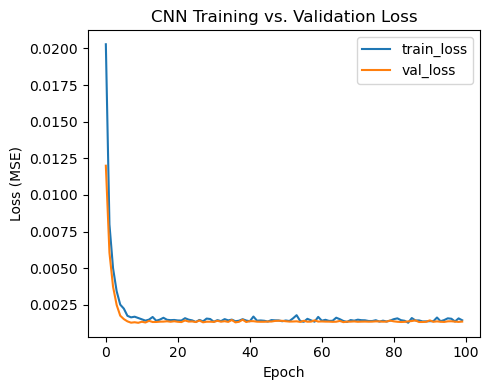

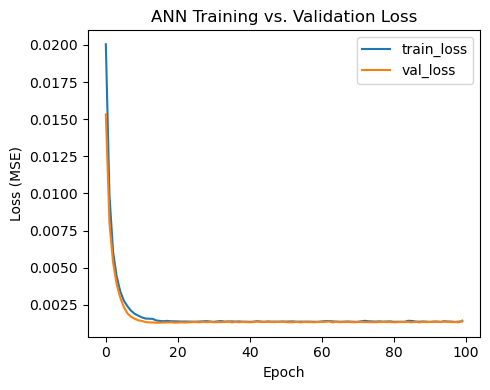

Loss function plots generated and saved for CNN and ANN


In [39]:
# Estimation of ML Loss Function Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import StackingRegressor

# Load and scale stratified data

True_train_data = pd.read_csv("True_Stratified_Training_Data.csv")
True_test_data  = pd.read_csv("True_Stratified_Testing_Data.csv")

scaler = MinMaxScaler()
scaler.fit(True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']])  # Fit on train only

True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)
True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)

X_train = True_train_data[['Resistivity (ohm.m)']]
y_train = True_train_data['Chargeability (msec)']
X_test  = True_test_data[['Resistivity (ohm.m)']]
y_test  = True_test_data['Chargeability (msec)']

# Defind ML Models
def create_cnn_model(n_features=1):
    model = keras.Sequential([
        keras.layers.Input(shape=(n_features, 1)),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def create_cnn_regressor(n_features):
    return KerasRegressor(model=create_cnn_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0, fit__validation_split=0.2)

def create_ann_model(n_features=1):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(n_features,)))
    model.add(keras.layers.Dense(256, activation='relu'))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))
    return model

def create_ann_regressor(n_features):
    return KerasRegressor(model=create_ann_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0, fit__validation_split=0.2)

def create_mlp():
    return MLPRegressor(hidden_layer_sizes=(256, 128, 64), alpha=0.0001, max_iter=5000, learning_rate_init=0.0001,
                        early_stopping=True, validation_fraction=0.2, n_iter_no_change=50, verbose=False, random_state=42)

def create_xgb_regressor():
    return XGBRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, eval_metric='rmse',
                        use_label_encoder=False, verbosity=0)

def create_catboost_regressor():
    return CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8,
                             random_seed=42, eval_metric='RMSE', verbose=False)

# Create actual model
n_features = X_train.shape[1]
models = {}
models["CNN"]      = create_cnn_regressor(n_features=n_features)
models["ANN"]      = create_ann_regressor(n_features=n_features)

# Train and plot loss curve

# CNN
cnn_reg = models["CNN"]
cnn_reg.fit(X_train, y_train)
if hasattr(cnn_reg, 'history_') and 'loss' in cnn_reg.history_:
    plt.figure(figsize=(5,4))
    plt.plot(cnn_reg.history_['loss'], label='train_loss')
    if 'val_loss' in cnn_reg.history_:
        plt.plot(cnn_reg.history_['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title("CNN Training vs. Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig("CNN_Loss_Curve.png", dpi=800)
    plt.show()

# ANN
ann_reg = models["ANN"]
ann_reg.fit(X_train, y_train)
if hasattr(ann_reg, 'history_') and 'loss' in ann_reg.history_:
    plt.figure(figsize=(5,4))
    plt.plot(ann_reg.history_['loss'], label='train_loss')
    if 'val_loss' in ann_reg.history_:
        plt.plot(ann_reg.history_['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title("ANN Training vs. Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig("ANN_Loss.png", dpi=800)
    plt.show()

print("Loss function plots generated and saved for CNN and ANN")


Training SLR ...
Predicting with SLR ...
Training SLR_poly ...
Predicting with SLR_poly ...
Training SVM ...
Predicting with SVM ...
Training RF ...
Predicting with RF ...
Training DT ...
Predicting with DT ...
Training XGB ...
Predicting with XGB ...
Training CatB ...
Predicting with CatB ...
Training ANN ...
Predicting with ANN ...
Training CNN ...
Predicting with CNN ...
Training Stacked ...
Predicting with Stacked ...


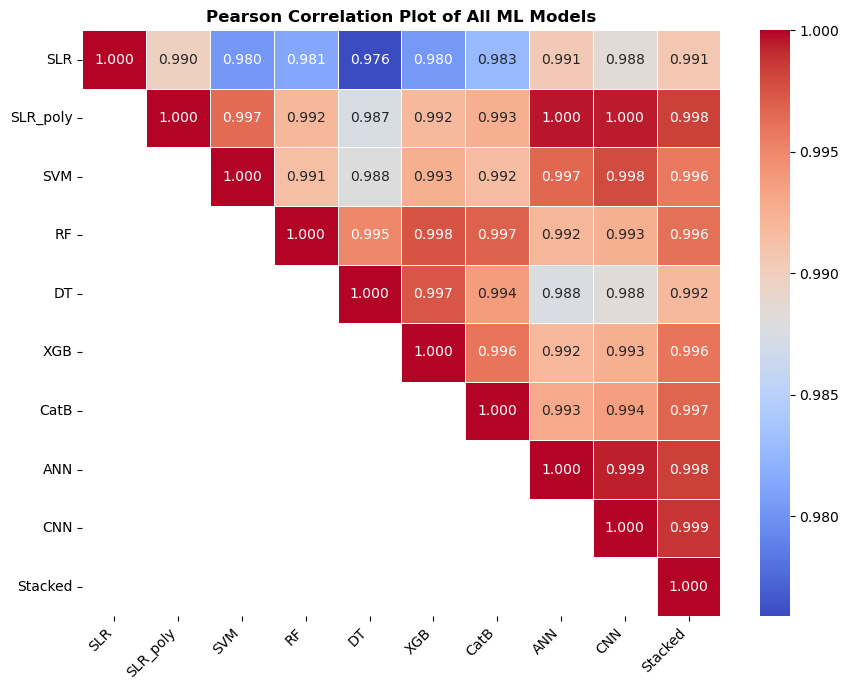

In [41]:
# Pearson Correlation Plot For ML Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import StackingRegressor
import seaborn as sns
from sklearn.base import clone
from scipy.stats import pearsonr

# Load true stratified datasets
True_train_data = pd.read_csv("True_Stratified_Training_Data.csv")
True_test_data = pd.read_csv("True_Stratified_Testing_Data.csv")

# Initialize and fit scaler only on training data
scaler = MinMaxScaler()
scaler.fit(True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']])

# Transform both training and test data using the same scaler
True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_train_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)
True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']] = scaler.transform(
    True_test_data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
)

# Extract feature (X) and target (y) for ML modeling
X_train, y_train = True_train_data[['Resistivity (ohm.m)']], True_train_data['Chargeability (msec)']
X_test, y_test = True_test_data[['Resistivity (ohm.m)']], True_test_data['Chargeability (msec)']

# Define a CNN Model for 1D Tabular Data
def create_cnn_model(n_features=1):
    model = keras.Sequential([
        keras.layers.Input(shape=(n_features, 1)),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def create_cnn_regressor(n_features): 
    return KerasRegressor(model=create_cnn_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0)

n_features = X_train.shape[1]

def make_log_ttr(regressor):
    return TransformedTargetRegressor(regressor=regressor, transformer=FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True))

# Define models with adjusted parameters for ML models
models = {
    "SLR": make_log_ttr(LinearRegression()),
    "SLR_poly": Pipeline([("poly", PolynomialFeatures(degree=3)), ("lr", LinearRegression())]),
    "SVM": SVR(kernel='rbf', C=4.0, epsilon=0.009, gamma='scale'),
    "RF": RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', random_state=42),
    "DT": DecisionTreeRegressor(max_depth=8, min_samples_split=4, min_samples_leaf=4, random_state=42),
    "XGB": GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, min_samples_leaf=5, random_state=42),
    "CatB": CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0),
    "ANN": MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=5000, alpha=0.0001, learning_rate_init=0.0001, early_stopping=True, 
            validation_fraction=0.1, n_iter_no_change=50, random_state=42),
    "CNN": create_cnn_regressor(n_features=n_features)
}

# Add a StackingRegressor that uses all models above as base learners
stacked_reg = StackingRegressor(
    estimators=[
        ('SLR',  models['SLR']), ('SLR_poly',  models['SLR_poly']), ('SVM',  models['SVM']), ('RF',   models['RF']), ('DT',   models['DT']),
        ('XGB',  models['XGB']), ('CatB', models['CatB']), ('ANN',  models['ANN']), ('CNN',  models['CNN'])],
    final_estimator=LinearRegression(),
    passthrough=False
)
models["Stacked"] = stacked_reg

# Train and gather prediction 
test_predictions = {}

model_list = ["SLR","SLR_poly","SVM","RF","DT","XGB","CatB","ANN","CNN","Stacked"]

for m_name in model_list:
    print(f"Training {m_name} ...")
    models[m_name].fit(X_train, y_train)
    print(f"Predicting with {m_name} ...")
    y_test_pred = models[m_name].predict(X_test)
    test_predictions[m_name] = y_test_pred

# Pearson correlation amongst all ML models
from scipy.stats import pearsonr

model_names = list(test_predictions.keys())
num_models = len(model_names)
pearson_matrix = np.zeros((num_models, num_models))

for i, m1 in enumerate(model_names):
    for j, m2 in enumerate(model_names):
        if i <= j:
            corr_val, _ = pearsonr(test_predictions[m1], test_predictions[m2])
            pearson_matrix[i, j] = corr_val
        else:
            pearson_matrix[i, j] = np.nan

pearson_df = pd.DataFrame(pearson_matrix, index=model_names, columns=model_names)

# Plot Pearson Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(pearson_df, annot=True, fmt=".3f", cmap="coolwarm", linewidths=0.5, mask=np.tril(pearson_matrix, k=-1))
plt.title("Pearson Correlation Plot of All ML Models", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.savefig("Pearson_Correlation_Matrix.png", dpi=800, bbox_inches='tight')
plt.show()


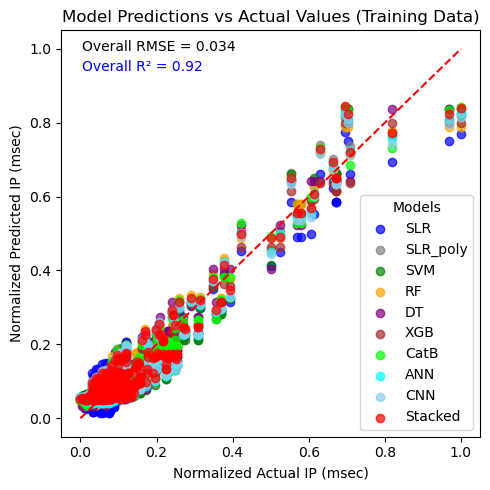

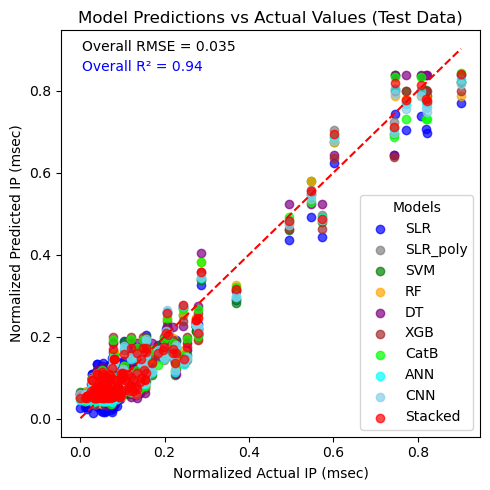

In [43]:
# Combined ML model prediction and overall modeling performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import StackingRegressor

# Define a CNN Model for 1D Tabular Data
def create_cnn_model(n_features=1):
    model = keras.Sequential([
        keras.layers.Input(shape=(n_features, 1)),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def create_cnn_regressor(n_features): 
    return KerasRegressor(model=create_cnn_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0)

n_features = X_train.shape[1]

def make_log_ttr(regressor):
    return TransformedTargetRegressor(regressor=regressor, transformer=FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True))

# Define models with adjusted parameters for ML models
models = {
    "SLR": make_log_ttr(LinearRegression()),
    "SLR_poly": Pipeline([("poly", PolynomialFeatures(degree=3)), ("lr", LinearRegression())]),
    "SVM": SVR(kernel='rbf', C=4.0, epsilon=0.009, gamma='scale'),
    "RF": RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', random_state=42),
    "DT": DecisionTreeRegressor(max_depth=8, min_samples_split=4, min_samples_leaf=4, random_state=42),
    "XGB": GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, min_samples_leaf=5, random_state=42),
    "CatB": CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0),
    "ANN": MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=5000, alpha=0.0001, learning_rate_init=0.0001, early_stopping=True, 
            validation_fraction=0.1, n_iter_no_change=50, random_state=42),
    "CNN": create_cnn_regressor(n_features=n_features)
}

# Add a StackingRegressor that uses all models above as base learners
stacked_reg = StackingRegressor(
    estimators=[
        ('SLR',  models['SLR']), ('SLR_poly',  models['SLR_poly']), ('SVM',  models['SVM']), ('RF',   models['RF']), ('DT',   models['DT']),
        ('XGB',  models['XGB']), ('CatB', models['CatB']), ('ANN',  models['ANN']), ('CNN',  models['CNN'])],
    final_estimator=LinearRegression(),
    passthrough=False
)
models["Stacked"] = stacked_reg

# Define distinct colors for each model
model_colors = {
    "SLR": "blue",
    "SLR_Poly": "black",
    "SVM": "green",
    "RF": "orange",
    "DT": "purple",
    "XGB": "brown",
    "CatB": "lime",
    "ANN": "cyan",
    "CNN": "skyblue",
    "Stacked": "red"
}

results = []
training_predictions = {}
test_predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    training_predictions[name] = y_train_pred
    test_predictions[name] = y_test_pred

    results.append({
        "Model": name,
        "R² Train": r2_score(y_train, y_train_pred),
        "R² Test": r2_score(y_test, y_test_pred),
        "RMSE Train": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "RMSE Test": np.sqrt(mean_squared_error(y_test, y_test_pred))
    })

results_df = pd.DataFrame(results)

overall_training_r2 = sum(results_df["R² Train"]) / len(results_df["R² Train"])
overall_test_r2 = sum(results_df["R² Test"]) / len(results_df["R² Test"])

overall_training_rmse = sum(results_df["RMSE Train"]) / len(results_df["RMSE Train"])
overall_test_rmse = sum(results_df["RMSE Test"]) / len(results_df["RMSE Test"])

results_df.to_csv("Model_Results_With_Overall_R2_RMSE.csv", index=False)

def generate_plot(predictions, actuals, dataset_name, overall_r2, overall_rmse):
    plt.figure(figsize=(5, 5))
    for name, preds in predictions.items():
        plt.scatter(actuals, preds, label=name, alpha=0.7, color=model_colors.get(name, "gray"))
    plt.plot([actuals.min(), actuals.max()], [actuals.min(), actuals.max()], color="red", linestyle="--")
    plt.title(f"Model Predictions vs Actual Values ({dataset_name} Data)")
    plt.xlabel("Normalized Actual IP (msec)")
    plt.ylabel("Normalized Predicted IP (msec)")
    plt.legend(title="Models")
    
    plt.text(0.05, 0.95, f"Overall RMSE = {overall_rmse:.3f}", transform=plt.gca().transAxes, fontsize=10, color="black")
    plt.text(0.05, 0.90, f"Overall R² = {overall_r2:.2f}", transform=plt.gca().transAxes, fontsize=10, color="blue")
    
    plt.tight_layout()
    plt.savefig(f"{dataset_name}_Predictions_vs_Actuals.png", dpi=800)
    plt.show()

generate_plot(training_predictions, y_train, "Training", overall_training_r2, overall_training_rmse)
generate_plot(test_predictions, y_test, "Test", overall_test_r2, overall_test_rmse)


Dataset loaded successfully.
Columns in dataset: ['X', 'Y', 'Resistivity', 'Chargeability']
Training SLR ...
Predicting for entire dataset with SLR ...
Training SLR_poly ...
Predicting for entire dataset with SLR_poly ...
Training SVM ...
Predicting for entire dataset with SVM ...
Training RF ...
Predicting for entire dataset with RF ...
Training DT ...
Predicting for entire dataset with DT ...
Training XGB ...
Predicting for entire dataset with XGB ...
Training CatB ...
Predicting for entire dataset with CatB ...
Training ANN ...
Predicting for entire dataset with ANN ...
Training CNN ...
Predicting for entire dataset with CNN ...
Training Stacked ...
Predicting for entire dataset with Stacked ...


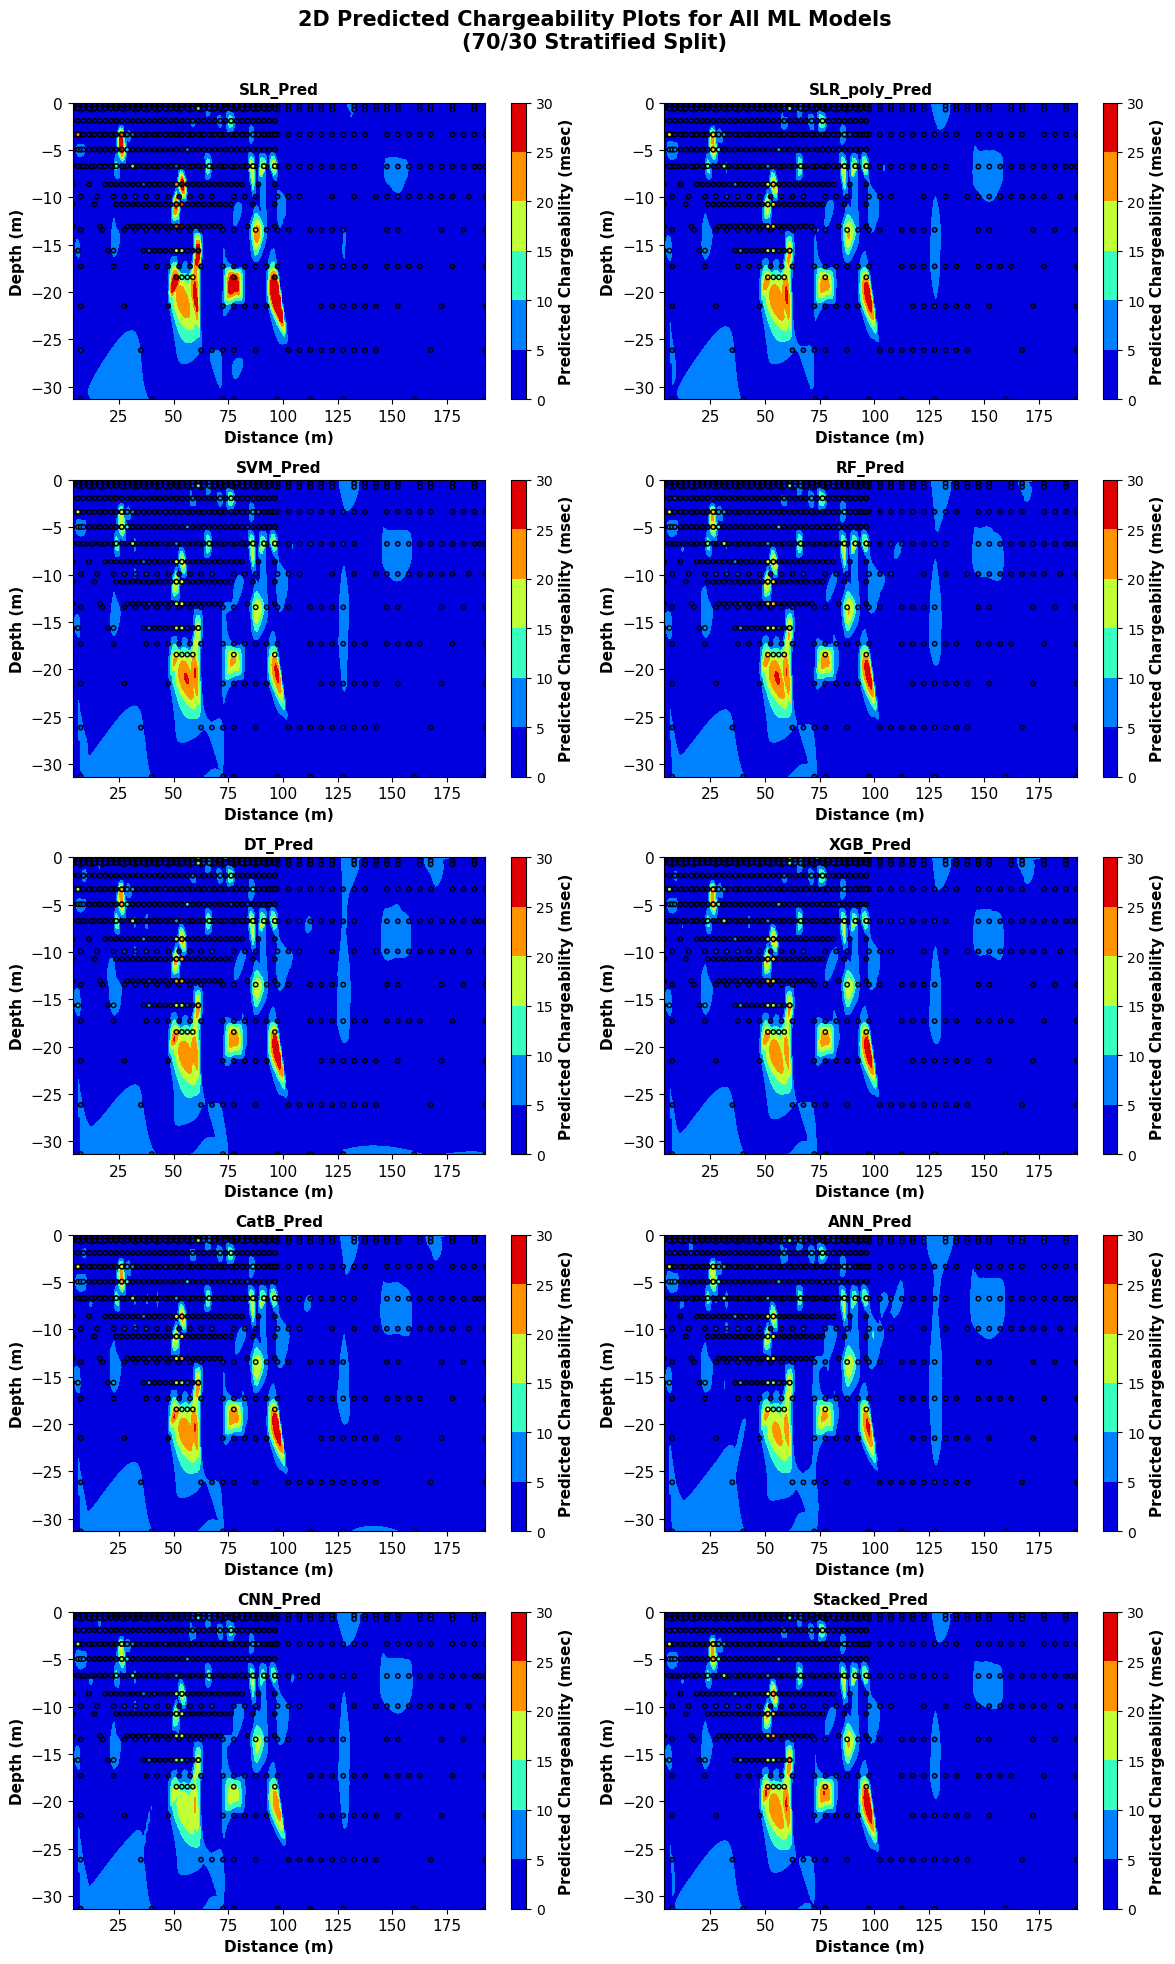

In [45]:
# Generating 2D Predicted Chargeability (IP) Models of the ML and DL Model Sets

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

# Load datasets
file_path = r"C:\Users\aking\OneDrive\Desktop\All Files\Papers under Review\ERT_IPT\ERT-IPT CFD.csv"
if not os.path.exists(file_path):
    print(f"Error: File not found at {file_path}. Exiting.")
    data = None
else:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Columns in dataset:", data.columns.tolist())

# Check for required columns
if data is not None:
    required_cols = ['X', 'Y', 'Resistivity', 'Chargeability']
    missing_req = [col for col in required_cols if col not in data.columns]
    if missing_req:
        print(f"Error: Missing columns: {missing_req}. Exiting.")
        data = None

if data is not None:
    data.rename(columns={'Chargeability (msec)': 'Chargeability'}, inplace=True)

# Create bins for stratified train/test data splits (70/30)
data['IP_bin'] = pd.qcut(data['Chargeability'], q=10, labels=False)
train_indices, test_indices = train_test_split(
    data.index,
    test_size=0.3,
    stratify=data['IP_bin'],
    random_state=42
)
# Drop 'IP_bin'
data.drop(columns='IP_bin', inplace=True)

# Define X_train, y_train, X_test, y_test
X_train = data.loc[train_indices, ['Resistivity']]
y_train = data.loc[train_indices, 'Chargeability']
X_test  = data.loc[test_indices, ['Resistivity']]
y_test  = data.loc[test_indices, 'Chargeability']

# Define a CNN Model for 1D Tabular Data
def create_cnn_model(n_features=1):
    model = keras.Sequential([
        keras.layers.Input(shape=(n_features, 1)),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Conv1D(256, kernel_size=1, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001))
    return model

def create_cnn_regressor(n_features): 
    return KerasRegressor(model=create_cnn_model, model__n_features=n_features, epochs=100, batch_size=16, verbose=0)

n_features = X_train.shape[1]

def make_log_ttr(regressor):
    return TransformedTargetRegressor(regressor=regressor, transformer=FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True))

# Define models with adjusted parameters for ML models
models = {
    "SLR": make_log_ttr(LinearRegression()),
    "SLR_poly": Pipeline([("poly", PolynomialFeatures(degree=3)), ("lr", LinearRegression())]),
    "SVM": SVR(kernel='rbf', C=4.0, epsilon=0.009, gamma='scale'),
    "RF": RandomForestRegressor(n_estimators=300, max_depth=12, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', random_state=42),
    "DT": DecisionTreeRegressor(max_depth=8, min_samples_split=4, min_samples_leaf=4, random_state=42),
    "XGB": GradientBoostingRegressor(n_estimators=300, learning_rate=0.01, max_depth=6, min_samples_leaf=5, random_state=42),
    "CatB": CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0),
    "ANN": MLPRegressor(hidden_layer_sizes=(256, 128, 64), max_iter=5000, alpha=0.0001, learning_rate_init=0.0001, early_stopping=True, 
            validation_fraction=0.1, n_iter_no_change=50, random_state=42),
    "CNN": create_cnn_regressor(n_features=n_features)
}

# Add a StackingRegressor that uses all models above as base learners
stacked_reg = StackingRegressor(
    estimators=[
        ('SLR',  models['SLR']), ('SLR_poly',  models['SLR_poly']), ('SVM',  models['SVM']), ('RF',   models['RF']), ('DT',   models['DT']),
        ('XGB',  models['XGB']), ('CatB', models['CatB']), ('ANN',  models['ANN']), ('CNN',  models['CNN'])],
    final_estimator=LinearRegression(),
    passthrough=False
)
models["Stacked"] = stacked_reg

# Train each model, the predict
for name, model in models.items():
    print(f"Training {name} ...")
    model.fit(X_train, y_train)
    print(f"Predicting for entire dataset with {name} ...")
    data[f"{name}_Pred"] = model.predict(data[['Resistivity']])

# 2D interpolation and plotting
grid_x = np.linspace(data['X'].min(), data['X'].max(), 200)
grid_y = np.linspace(data['Y'].min(), data['Y'].max(), 200)
X_grid, Y_grid = np.meshgrid(grid_x, grid_y)

# Plot and interpolate predictions from each model
model_predictions = {}
for name in models.keys():
    pred_col = f"{name}_Pred"
    if pred_col in data.columns:
        # Interpolate
        interp_grid = griddata((data['X'], data['Y']), data[pred_col], (X_grid, Y_grid), method='cubic')
        # Replace NaNs
        interp_grid = np.nan_to_num(interp_grid)
        interp_grid = np.clip(interp_grid, 0, 30)
        model_predictions[name] = interp_grid
    else:
        print(f"No predictions found for {name}, skipping.")

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))
axes = axes.flatten()
levels = np.linspace(0, 30, 7)

idx = 0
for name in models.keys():
    if name in model_predictions:
        grid_data = model_predictions[name]
        ax = axes[idx]
        contour = ax.contourf(X_grid, Y_grid, grid_data, cmap='jet', levels=levels, vmin=0, vmax=30)
            
        cbar = plt.colorbar(contour, ax=ax)
        cbar.set_label("Predicted Chargeability (msec)", fontsize=11, fontweight="bold")

        # Scatter original data with same color scale
        sc = ax.scatter(data['X'], data['Y'], c=np.clip(data[f"{name}_Pred"], 0, 30), cmap='jet', edgecolors='k', s=10, vmin=0, vmax=30)
            
        ax.set_title(f"{name}_Pred", fontsize=11, fontweight='bold')
        ax.set_xlabel("Distance (m)", fontsize=11, fontweight="bold")
        ax.set_xlim(data['X'].min(), data['X'].max())
        ax.set_ylabel("Depth (m)", fontsize=11, fontweight="bold")
        ax.set_ylim(data['Y'].min(), data['Y'].max())
        ax.tick_params(axis='both', which='major', labelsize=11)
        idx += 1

# Hide extra subplots
if idx < len(axes):
    for ax in axes[idx:]:
        ax.set_visible(False)

plt.suptitle("2D Predicted Chargeability Plots for All ML Models\n(70/30 Stratified Split)", fontsize=15, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("All_Models_Comparison.png", dpi=800)
plt.show()


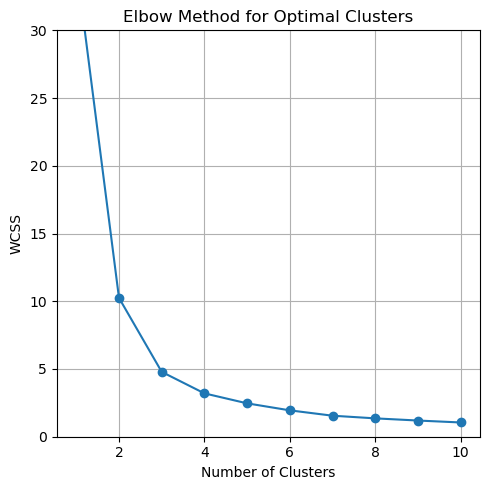

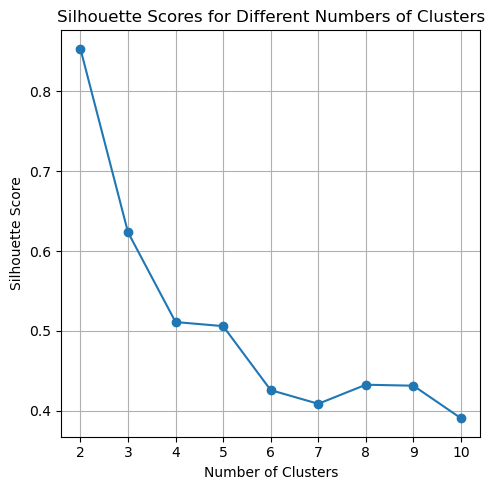

File Elbow_Method_Clusters.png is ready for download.
File Silhouette_Scores_Clusters.png is ready for download.
File WCSS_Values_Clusters.csv is ready for download.
File Silhouette_Scores_Clusters.csv is ready for download.


In [104]:
# Optimal cluster selection methods and K-means clustering to define surface-surface lithological units and boundaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import warnings

os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

file_path = "C:/Users/aking/OneDrive/Desktop/All Files/Papers under Review/ERT_IPT/ERT-IPT ML Datasets.csv"
data = pd.read_csv(file_path)

# Features for clustering and normalization
features = data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

pd.DataFrame({'Clusters': range(1, 11), 'WCSS': wcss}).to_csv("WCSS_Values_Clusters.csv", index=False)

plt.figure(figsize=(5, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.ylim(0, 30)
plt.grid()
plt.tight_layout()
plt.savefig("Elbow_Method_Clusters.png", dpi=800)
plt.show()

# Silhouette Scores
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(normalized_features)
    silhouette_avg = silhouette_score(normalized_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

pd.DataFrame({'Clusters': range(2, 11), 'Silhouette Score': silhouette_scores}).to_csv("Silhouette_Scores_Clusters.csv", index=False)

plt.figure(figsize=(5, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.tight_layout()
plt.savefig("Silhouette_Scores_Clusters.png", dpi=800)
plt.show()

prepare_download("Elbow_Method_Clusters.png")
prepare_download("Silhouette_Scores_Clusters.png")
prepare_download("WCSS_Values_Clusters.csv")
prepare_download("Silhouette_Scores_Clusters.csv")


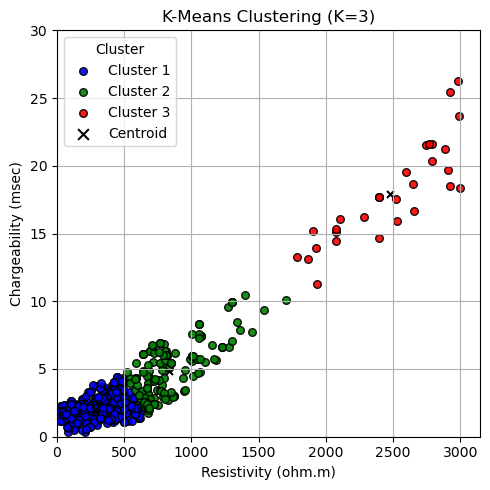

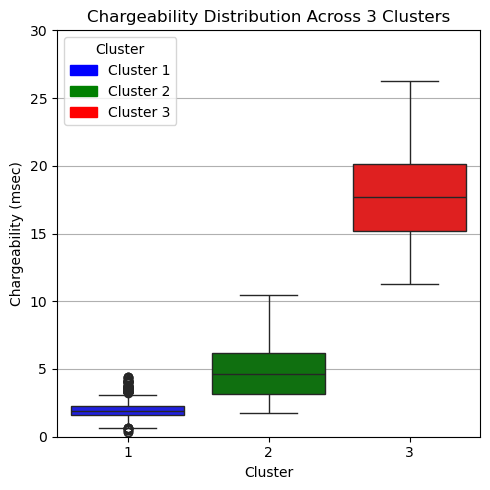

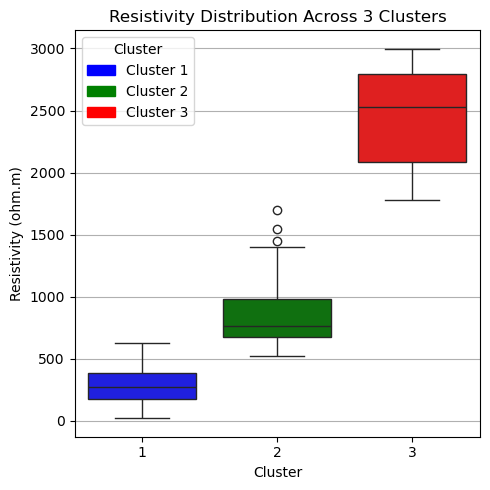

Clustered layers saved to 'Clustered_Layers_with_Centroids_3_Clusters.csv'
File Clustered_Layers_with_Centroids_3_Clusters.csv is ready for download.
File Layer_Classification_with_Centroids_3_Clusters.png is ready for download.
File Average_Centroids_3_Clusters.csv is ready for download.


In [96]:
# Optimal cluster selection methods and K-means clustering to define surface-surface lithological units and boundaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os
import warnings

# K-means with 3 clusters
os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

file_path = "C:/Users/aking/OneDrive/Desktop/All Files/Papers under Review/ERT_IPT/ERT-IPT ML Datasets.csv"
data = pd.read_csv(file_path)

# Features for clustering and normalization
features = data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)


# K-means with 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(normalized_features)

data['Cluster_temp'] = cluster_labels

# Sort clusters by ascending mean Resistivity
mean_resistivity = data.groupby('Cluster_temp')['Resistivity (ohm.m)'].mean()
sorted_clusters = mean_resistivity.sort_values().index.tolist()

old_to_new = {}
for i, old_cluster in enumerate(sorted_clusters, start=1):
    old_to_new[old_cluster] = i

data['Cluster'] = data['Cluster_temp'].map(old_to_new)

# Inverse-transform centroids to original scale
unscaled_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(unscaled_centroids, columns=['Resistivity (ohm.m)', 'Chargeability (msec)'])
centroids_df['Cluster_temp'] = range(optimal_k)
centroids_df['Cluster'] = centroids_df['Cluster_temp'].map(old_to_new)
centroids_df.drop(columns='Cluster_temp', inplace=True)
centroids_df.to_csv("Average_Centroids_3_Clusters.csv", index=False)

cluster_colors = {1: 'blue', 2: 'green', 3: 'red'}

# Scatter Plot with sorted clusters
plt.figure(figsize=(5, 5))
for cluster_id, group in data.groupby('Cluster'):
    plt.scatter(
        group['Resistivity (ohm.m)'],
        group['Chargeability (msec)'],
        color=cluster_colors[cluster_id],
        label=f"Cluster {cluster_id}",
        alpha=0.9, edgecolor='k', s=30
    )

for cluster_id, row in centroids_df.groupby('Cluster'):
    plt.scatter(
        row['Resistivity (ohm.m)'],
        row['Chargeability (msec)'],
        color='black', marker='x', s=25
    )
plt.scatter([], [], color='black', marker='x', s=60, label='Centroid')

plt.title('K-Means Clustering (K=3)')
plt.xlabel('Resistivity (ohm.m)')
plt.ylabel('Chargeability (msec)')
plt.xlim(0,)
plt.ylim(0, 30)
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.savefig("Layer_Classification_with_Centroids_3_Clusters.png", dpi=800)
plt.show()

# Drop temp column
data.drop(columns='Cluster_temp', inplace=True)

# Boxplots: use string cluster keys for palette
data['Cluster_str'] = data['Cluster'].astype(str)
boxplot_colors = {'1': 'blue', '2': 'green', '3': 'red'}

# Box Plot for Chargeability
plt.figure(figsize=(5, 5))
sns.boxplot(
    x='Cluster_str', 
    y='Chargeability (msec)', 
    hue='Cluster_str',
    data=data, 
    palette=boxplot_colors, 
    dodge=False
)
plt.title('Chargeability Distribution Across 3 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Chargeability (msec)')
plt.ylim(0, 30)
plt.grid(axis='y')

plt.legend([],[], frameon=False)

# Manually build legend
legend_patches = [
    mpatches.Patch(color=color, label=f"Cluster {cluster_id}")
    for cluster_id, color in boxplot_colors.items()
]
plt.legend(handles=legend_patches, title='Cluster', loc='upper left')

plt.tight_layout()
plt.savefig("Boxplot_Chargeability_vs_Clusters.png", dpi=800)
plt.show()

# Box Plot for Resistivity
plt.figure(figsize=(5, 5))
sns.boxplot(
    x='Cluster_str', 
    y='Resistivity (ohm.m)', 
    hue='Cluster_str',
    data=data, 
    palette=boxplot_colors, 
    dodge=False
)
plt.title('Resistivity Distribution Across 3 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Resistivity (ohm.m)')
plt.grid(axis='y')

plt.legend([],[], frameon=False)
legend_patches = [
    mpatches.Patch(color=color, label=f"Cluster {cluster_id}")
    for cluster_id, color in boxplot_colors.items()
]
plt.legend(handles=legend_patches, title='Cluster', loc='upper left')

plt.tight_layout()
plt.savefig("Boxplot_Resistivity_vs_3_Clusters.png", dpi=800)
plt.show()

data.to_csv("Clustered_Layers_with_Centroids_3_Clusters.csv", index=False)
print("Clustered layers saved to 'Clustered_Layers_with_Centroids_3_Clusters.csv'")

def prepare_download(file_name):
    print(f"File {file_name} is ready for download.")

prepare_download("Clustered_Layers_with_Centroids_3_Clusters.csv")
prepare_download("Layer_Classification_with_Centroids_3_Clusters.png")
prepare_download("Average_Centroids_3_Clusters.csv")


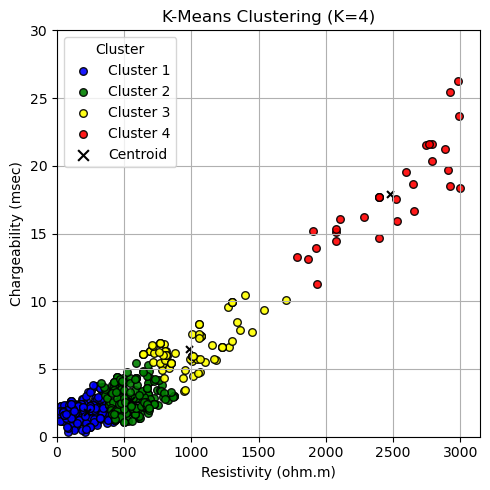

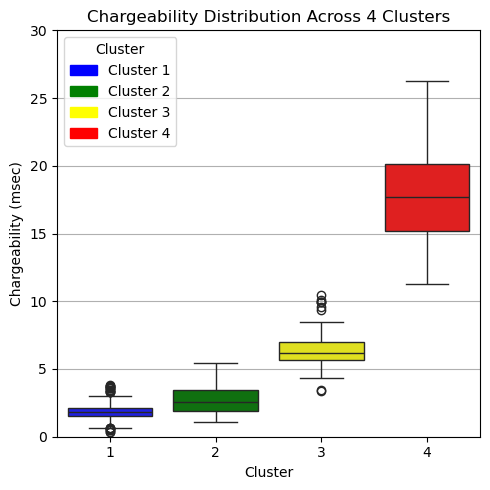

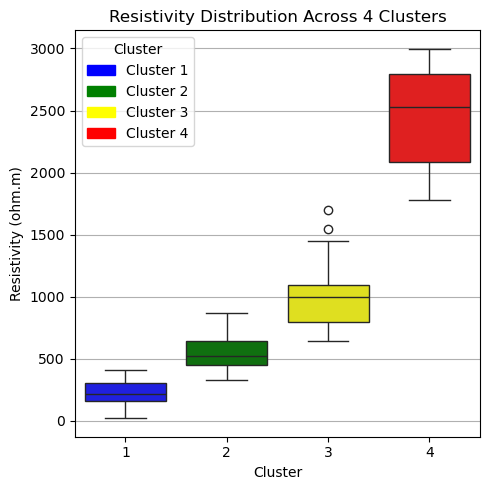

Clustered layers saved to 'Clustered_Layers_with_Centroids_4_Clusters.csv'
File Clustered_Layers_with_Centroids_4_Clusters.csv is ready for download.
File Layer_Classification_with_Centroids_4_Clusters.png is ready for download.
File Average_Centroids_4_Clusters.csv is ready for download.


In [102]:
# K-means with 4 clusters

os.environ["OMP_NUM_THREADS"] = "1"
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

file_path = "C:/Users/aking/OneDrive/Desktop/All Files/Papers under Review/ERT_IPT/ERT-IPT ML Datasets.csv"
data = pd.read_csv(file_path)

# Features for clustering and normalization
features = data[['Resistivity (ohm.m)', 'Chargeability (msec)']]
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(features)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(normalized_features)

data['Cluster_temp'] = cluster_labels

# Sort clusters by ascending mean Resistivity
mean_resistivity = data.groupby('Cluster_temp')['Resistivity (ohm.m)'].mean()
sorted_clusters = mean_resistivity.sort_values().index.tolist()

old_to_new = {}
for i, old_cluster in enumerate(sorted_clusters, start=1):
    old_to_new[old_cluster] = i

data['Cluster'] = data['Cluster_temp'].map(old_to_new)

# Inverse-transform centroids to original scale
unscaled_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(unscaled_centroids, columns=['Resistivity (ohm.m)', 'Chargeability (msec)'])
centroids_df['Cluster_temp'] = range(optimal_k)
centroids_df['Cluster'] = centroids_df['Cluster_temp'].map(old_to_new)
centroids_df.drop(columns='Cluster_temp', inplace=True)
centroids_df.to_csv("Average_Centroids_4_Clusters.csv", index=False)

cluster_colors = {1: 'blue', 2: 'green', 3: 'yellow', 4: 'red'}

# Scatter Plot with sorted clusters
plt.figure(figsize=(5, 5))
for cluster_id, group in data.groupby('Cluster'):
    plt.scatter(
        group['Resistivity (ohm.m)'],
        group['Chargeability (msec)'],
        color=cluster_colors[cluster_id],
        label=f"Cluster {cluster_id}",
        alpha=0.9, edgecolor='k', s=30
    )

for cluster_id, row in centroids_df.groupby('Cluster'):
    plt.scatter(
        row['Resistivity (ohm.m)'],
        row['Chargeability (msec)'],
        color='black', marker='x', s=25
    )
plt.scatter([], [], color='black', marker='x', s=60, label='Centroid')

plt.title('K-Means Clustering (K=4)')
plt.xlabel('Resistivity (ohm.m)')
plt.ylabel('Chargeability (msec)')
plt.xlim(0,)
plt.ylim(0, 30)
plt.legend(title='Cluster')
plt.grid()
plt.tight_layout()
plt.savefig("Layer_Classification_with_Centroids_4_Clusters.png", dpi=800)
plt.show()

# Drop temp column
data.drop(columns='Cluster_temp', inplace=True)

# Boxplots: use string cluster keys for palette
data['Cluster_str'] = data['Cluster'].astype(str)
boxplot_colors = {'1': 'blue', '2': 'green', '3': 'yellow', '4': 'red'}

# Box Plot for Chargeability
plt.figure(figsize=(5, 5))
sns.boxplot(
    x='Cluster_str', 
    y='Chargeability (msec)', 
    hue='Cluster_str',
    data=data, 
    palette=boxplot_colors, 
    dodge=False
)
plt.title('Chargeability Distribution Across 4 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Chargeability (msec)')
plt.ylim(0, 30)
plt.grid(axis='y')

# Remove auto legend from hue
plt.legend([],[], frameon=False)

# Manually build legend
legend_patches = [
    mpatches.Patch(color=color, label=f"Cluster {cluster_id}")
    for cluster_id, color in boxplot_colors.items()
]
plt.legend(handles=legend_patches, title='Cluster', loc='upper left')

plt.tight_layout()
plt.savefig("Boxplot_Chargeability_vs_4_Clusters.png", dpi=800)
plt.show()

# Box Plot for Resistivity
plt.figure(figsize=(5, 5))
sns.boxplot(
    x='Cluster_str', 
    y='Resistivity (ohm.m)', 
    hue='Cluster_str',
    data=data, 
    palette=boxplot_colors, 
    dodge=False
)
plt.title('Resistivity Distribution Across 4 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Resistivity (ohm.m)')
plt.grid(axis='y')

plt.legend([],[], frameon=False)
legend_patches = [
    mpatches.Patch(color=color, label=f"Cluster {cluster_id}")
    for cluster_id, color in boxplot_colors.items()
]
plt.legend(handles=legend_patches, title='Cluster', loc='upper left')

plt.tight_layout()
plt.savefig("Boxplot_Resistivity_vs_4_Clusters.png", dpi=800)
plt.show()

data.to_csv("Clustered_Layers_with_Centroids_4_Clusters.csv", index=False)
print("Clustered layers saved to 'Clustered_Layers_with_Centroids_4_Clusters.csv'")

def prepare_download(file_name):
    print(f"File {file_name} is ready for download.")

prepare_download("Clustered_Layers_with_Centroids_4_Clusters.csv")
prepare_download("Layer_Classification_with_Centroids_4_Clusters.png")
prepare_download("Average_Centroids_4_Clusters.csv")


Training Data Columns: ['Resistivity (ohm.m)', 'Chargeability (msec)', 'IP_bin']
Testing Data Columns: ['Resistivity (ohm.m)', 'Chargeability (msec)', 'IP_bin']


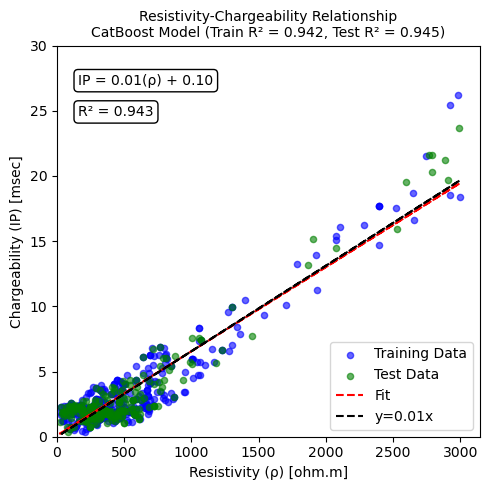

In [ ]:
# Resistivity-Chargeability Statistical Relationship (CatBoost Model)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# Load true stratified datasets
True_train_data = pd.read_csv("True_Stratified_Training_Data.csv")
True_test_data = pd.read_csv("True_Stratified_Testing_Data.csv")

# Print column names to verify
print("Training Data Columns:", True_train_data.columns.tolist())
print("Testing Data Columns:", True_test_data.columns.tolist())

# Update column names based on the actual column names in your dataset
resistivity_column = "Resistivity (ohm.m)"
chargeability_column = "Chargeability (msec)"

# Extract features and targets
X_train = True_train_data[[resistivity_column]]
y_train = True_train_data[chargeability_column]
X_test = True_test_data[[resistivity_column]]
y_test = True_test_data[chargeability_column]

# Combine all data for best-fit line calculation
combined_resistivity = pd.concat([X_train, X_test]).values.flatten()
combined_chargeability = pd.concat([y_train, y_test]).values

# Train CatBoost model
model = CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0)
model.fit(X_train, y_train)

# Predict chargeability for training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² score for training and testing data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Calculate the equation line (y = mx + c) for combined data
m, c = np.polyfit(combined_resistivity, model.predict(combined_resistivity.reshape(-1, 1)), 1)
equation_line = f"y = {m:.2f}x + {c:.2f}"

# Calculate the line from the origin (y = mx) for combined data
m_origin = np.sum(combined_resistivity * model.predict(combined_resistivity.reshape(-1, 1))) / np.sum(combined_resistivity**2)

# Calculate overall R² for combined data
overall_r_squared = r2_score(combined_chargeability, model.predict(combined_resistivity.reshape(-1, 1)))

# Create a scatter plot of IP vs Resistivity: training and test datasets
plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train, label="Training Data", color='blue', alpha=0.6, s=20)
plt.scatter(X_test, y_test, label="Test Data", color='green', alpha=0.6, s=20)

# Plot the line of best fit (y = mx + c)
plt.plot(combined_resistivity, m * combined_resistivity + c, color='red', linestyle='--', linewidth=1.5, label=f"Fit")

# Plot the line from the origin (y = mx)
origin_line = "Line from Origin"
plt.plot(combined_resistivity, m_origin * combined_resistivity, color='black', linestyle='--', linewidth=1.5, label=f"{'y=0.01x'}")

# Add equation and overall R² to the plot
plt.text(0.05, 0.90, f"IP = {m:.2f}(ρ) + {c:.2f}", transform=plt.gca().transAxes, fontsize=10, color="black",
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)
plt.text(0.05, 0.82, f"R² = {overall_r_squared:.3f}", transform=plt.gca().transAxes, fontsize=10, color="black",
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)

# Add labels and title
plt.xlabel("Resistivity (ρ) [ohm.m]")
plt.xlim(0,)
plt.ylabel("Chargeability (IP) [msec]")
plt.ylim(0, 30)
plt.title(f"Resistivity-Chargeability Relationship\nCatBoost Model (Train R² = {train_r2:.3f}, Test R² = {test_r2:.3f})", fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig("Resistivity-Chargeability Statistical Relationship.png", dpi=800)
plt.show()

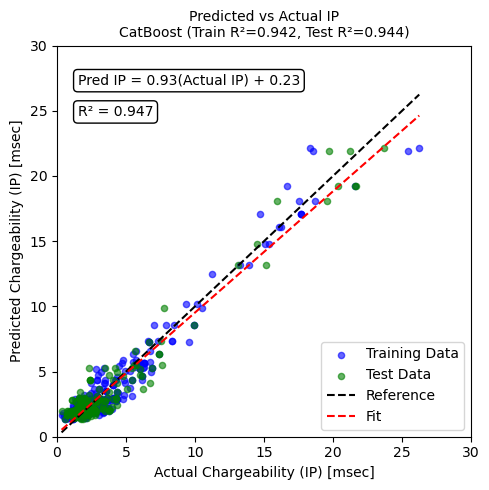

In [ ]:
# Predicted vs Actual IP using CatBoost Regressor Relationship

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# FILE PATHS FOR TRAINING AND TESTING CSV FILES
train_file_path = r"C:\Users\aking\OneDrive\Desktop\All Files\Papers under Review\ERT_IPT\Predicted_vs_Actual_IP_Training.csv"
test_file_path  = r"C:\Users\aking\OneDrive\Desktop\All Files\Papers under Review\ERT_IPT\Predicted_vs_Actual_IP_Testing.csv"

# LOAD TRAINING AND TEST DATASETS
train_df = pd.read_csv(train_file_path)
test_df  = pd.read_csv(test_file_path)

# RENAME COLUMNS TO MATCH EXPECTED NAMES
train_df.rename(columns={'Actual IP (msec)': 'Actual IP','Predicted IP (msec)': 'Predicted IP'}, inplace=True)
test_df.rename(columns={'Actual IP (msec)': 'Actual IP','Predicted IP (msec)': 'Predicted IP'}, inplace=True)

# DEFINE X_train, y_train, X_test, y_test
X_train = train_df[["Predicted IP"]]
y_train = train_df["Actual IP"]
X_test  = test_df[["Predicted IP"]]
y_test  = test_df["Actual IP"]

# TRAIN A CATBOOST MODEL ON (X=Predicted IP, y=Actual IP)
model = CatBoostRegressor(iterations=600, learning_rate=0.05, max_depth=6, l2_leaf_reg=5, subsample=0.8, random_seed=42, verbose=0)
model.fit(X_train, y_train)

# MODEL PREDICTIONS FOR TRAIN & TEST, THEN R² SCORES
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)
train_r2 = r2_score(y_train, y_train_pred)
test_r2  = r2_score(y_test, y_test_pred)

# COMBINE ALL DATA (ACTUAL & PREDICTED) FOR BEST-FIT LINE
combined_actual_ip = pd.concat([y_train, y_test], ignore_index=True)
combined_pred_ip   = np.concatenate([y_train_pred, y_test_pred])

# FIT A LINE: y = m*x + c, WHERE x=ACTUAL IP, y=MODEL'S PREDICTED IP
m, c = np.polyfit(combined_actual_ip, combined_pred_ip, 1)
equation_line = f"Pred IP = {m:.2f}(Actual IP) + {c:.2f}"
line_predicted_ip = m * combined_actual_ip + c

# OVERALL R² BETWEEN (ACTUAL IP, BEST-FIT LINE PREDICTION)
overall_r2 = r2_score(combined_pred_ip, line_predicted_ip)

# PLOTTING A SINGLE FIGURE
plt.figure(figsize=(5, 5))
plt.scatter(y_train, y_train_pred, label="Training Data", color='blue', alpha=0.6, s=20)
plt.scatter(y_test, y_test_pred, label="Test Data", color='green', alpha=0.6, s=20)
plt.plot([combined_actual_ip.min(), combined_actual_ip.max()],[combined_actual_ip.min(), combined_actual_ip.max()],
         color='black', linestyle='--', linewidth=1.5, label="Reference")

# PLOT THE BEST-FIT LINE (BLACK) ACROSS COMBINED ACTUAL IP
sorted_idx = np.argsort(combined_actual_ip)
plt.plot(combined_actual_ip[sorted_idx], line_predicted_ip[sorted_idx], color='red', linestyle='--', linewidth=1.5, label="Fit")

# DISPLAY OVERALL R² & EQUATION ON THE PLOT
plt.text(0.05, 0.90, f"{equation_line}", transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
plt.text(0.05, 0.82, f"R² = {r2:.3f}", transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# LABELS, TITLE, LEGEND, SAVE
plt.xlabel("Actual Chargeability (IP) [msec]")
plt.xlim(0,30)
plt.ylabel("Predicted Chargeability (IP) [msec]")
plt.ylim(0, 30)
plt.title(f"Predicted vs Actual IP\nCatBoost (Train R²={train_r2:.3f}, Test R²={test_r2:.3f})", fontsize=10)
plt.legend()
plt.tight_layout()
plt.savefig("Predicted_vs_Actual_IP_CatBoost_SinglePlot.png", dpi=800)
plt.show()
